In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BTC-Daily.csv')

# ANALISIS EXPLORATORIO DE DATOS (EDA)

* El analisis exploratorio de datos tiene como objetivo obtener informacion sobre el dataset escogido

In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [5]:
df.shape

(2651, 9)

# PREPROCESAMIENTO

In [6]:
df.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['unix', 'symbol', 'Volume BTC', 'Volume USD'])

# Convertir 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Establecer 'date' como índice
df.set_index('date', inplace=True)

# Verificar el DataFrame resultante
df.head()


,open,high,low,close
date,,,,
2022-03-01,43221.71,43626.49,43185.48,43185.48
2022-02-28,37717.10,44256.08,37468.99,43178.98
2022-02-27,39146.66,39886.92,37015.74,37712.68
2022-02-26,39242.64,40330.99,38600.00,39146.66
2022-02-25,38360.93,39727.97,38027.61,39231.64


In [8]:
df.describe()

,open,high,low,close
count,2651.000000,2651.000000,2651.000000,2651.000000
mean,11693.189332,12038.562912,11296.539461,11709.326213
std,16272.554746,16739.237000,15718.297511,16282.908704
min,162.000000,212.840000,152.400000,162.000000
25%,654.680000,664.460000,640.050000,654.370000
50%,6408.950000,6540.000000,6312.000000,6407.770000
75%,10708.620000,10956.240000,10303.755000,10726.425000
max,67547.490000,69000.000000,66250.000000,67559.000000


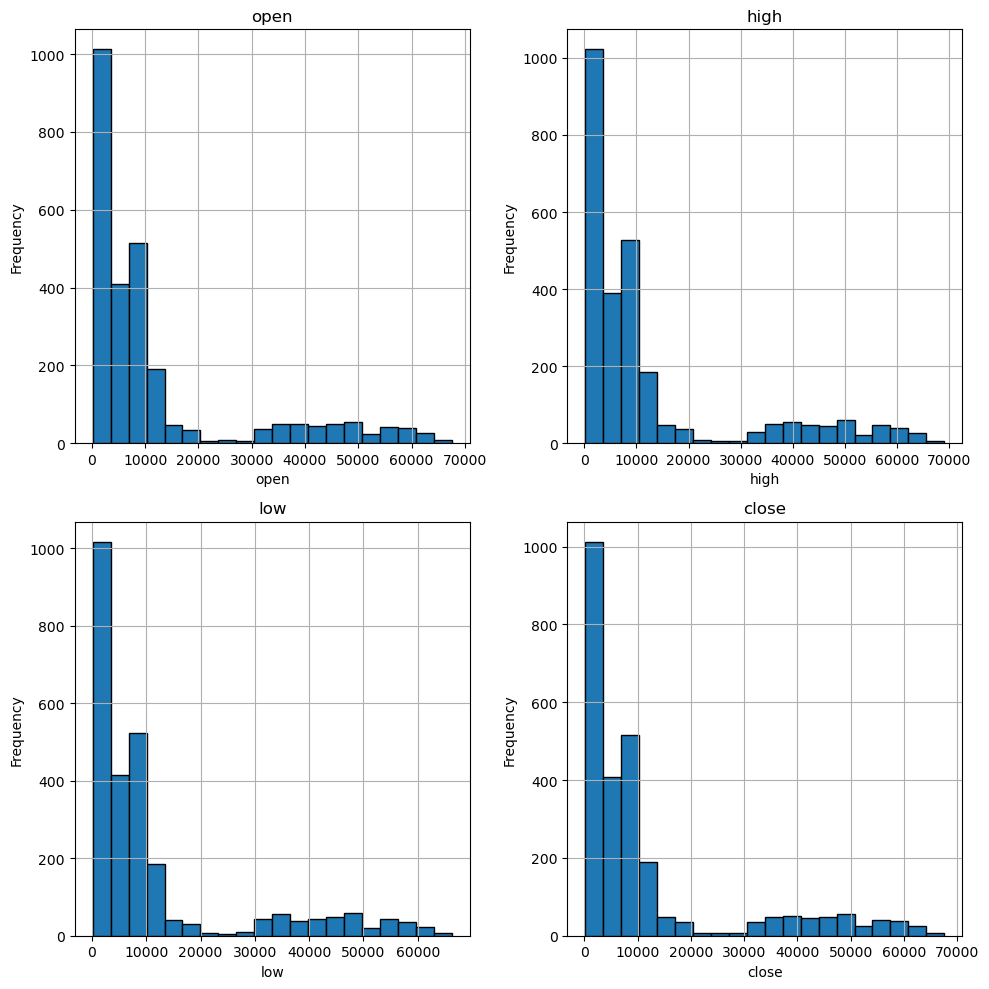

In [9]:
import matplotlib.pyplot as plt
import math

# Filtrar columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular el número de filas y columnas de forma automática
num_plots = len(numeric_cols)
cols = math.ceil(math.sqrt(num_plots)) 
rows = math.ceil(num_plots / cols)     

# Configurar los subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

# Graficar cada columna numérica
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].plot(kind='hist', ax=ax, title=col, bins=20, edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Ocultar subplots vacíos si existen
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


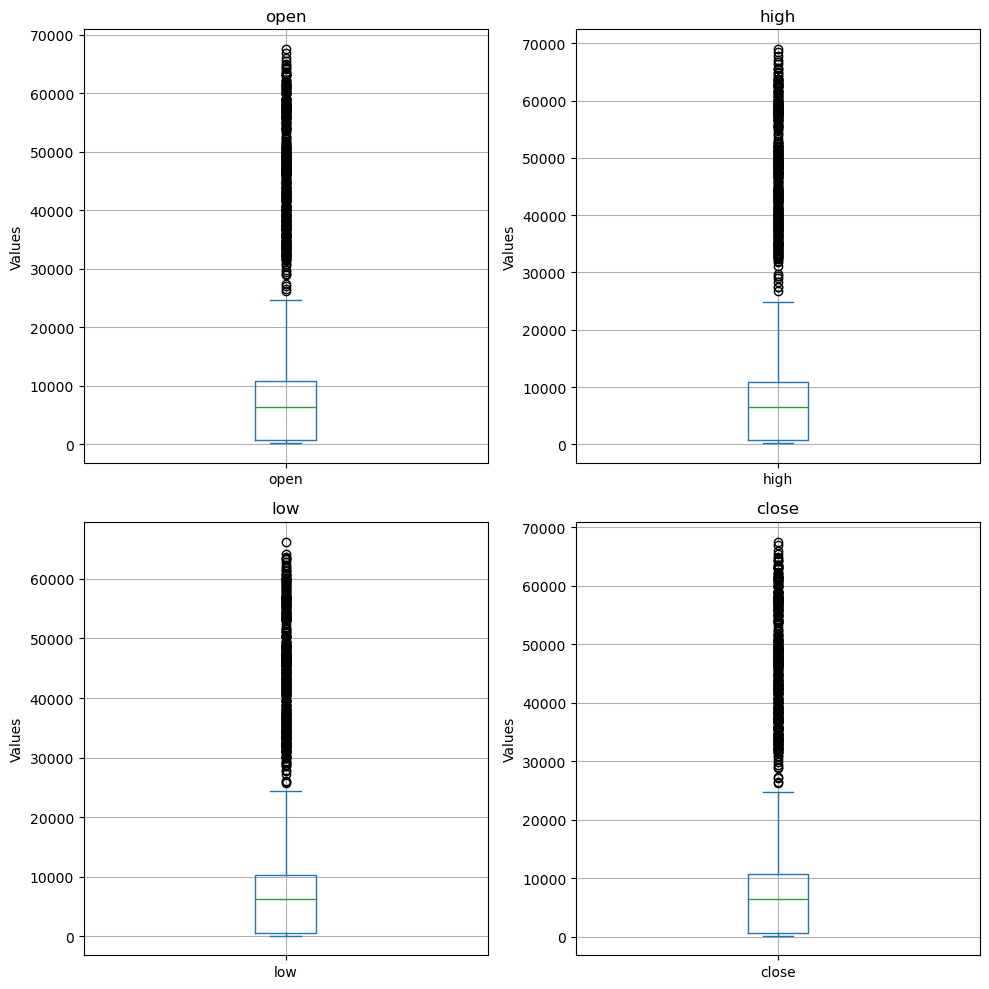

In [10]:
import matplotlib.pyplot as plt
import math

# Filtrar columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular el número de filas y columnas de forma automática
num_plots = len(numeric_cols)
cols = math.ceil(math.sqrt(num_plots)) 
rows = math.ceil(num_plots / cols)      

# Configurar los subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

# Crear boxplots para cada columna numérica
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].plot(kind='box', ax=ax, title=col)
    ax.set_ylabel('Values')
    ax.grid(True)

# Ocultar subplots vacíos si existen
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


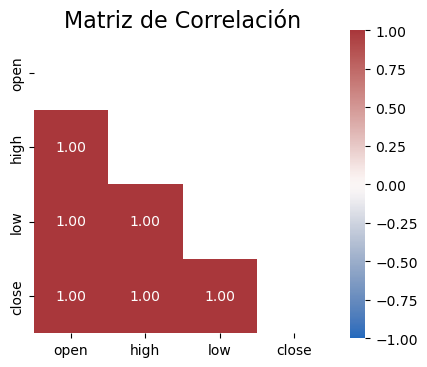

In [11]:
import seaborn as sns
import numpy as np

# Filtrar columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación
matrix = df[numeric_cols].corr().round(2)

# Crear una máscara para la parte superior del mapa de calor
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Configurar el tamaño de la figura en función de las dimensiones de la matriz
plt.figure(figsize=(len(numeric_cols) * 1.2, len(numeric_cols) * 1))

# Graficar el mapa de calor
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, square=True, fmt='.2f')

# Agregar título
plt.title('Matriz de Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()


# TRATAMIENTO DE OUTLIERS


El boxplot por columna puede proporcionar informacion necesaria sobre la cantidad de outliers.
Los outliers de detectan mediante el metodo de recorrido intercuartil, luego de esos se convertiran en NaN, para luego imputar los valores perdidos mediante el metodo de la interpolacion, de esta manera disminuimos los errores.

In [ ]:
import numpy as np

# Función para identificar outliers utilizando el método IQR
def detectar_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    return (data < umbral_inferior) | (data > umbral_superior)

# Asegurarse de que el índice es un DatetimeIndex y está en orden cronológico
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Identificar outliers en cada columna (excepto 'day_of_week') y convertirlos en NaN
for column in df.columns:
    if column != 'day_of_week':
        outliers = detectar_outliers_IQR(df[column])
        df.loc[outliers, column] = np.nan

# Resamplear los datos a una frecuencia diaria y rellenar valores faltantes con interpolación
df = df.resample('D').interpolate()

# Imprimir el dataframe resultante
df.head()

In [12]:
df.shape

(2651, 4)

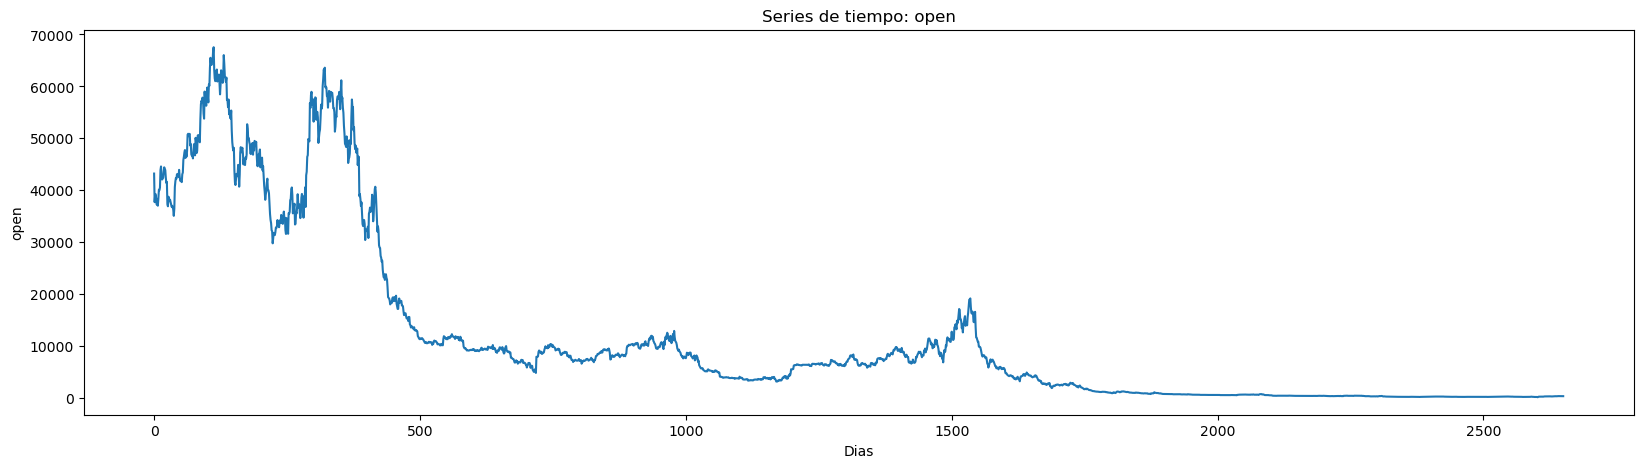

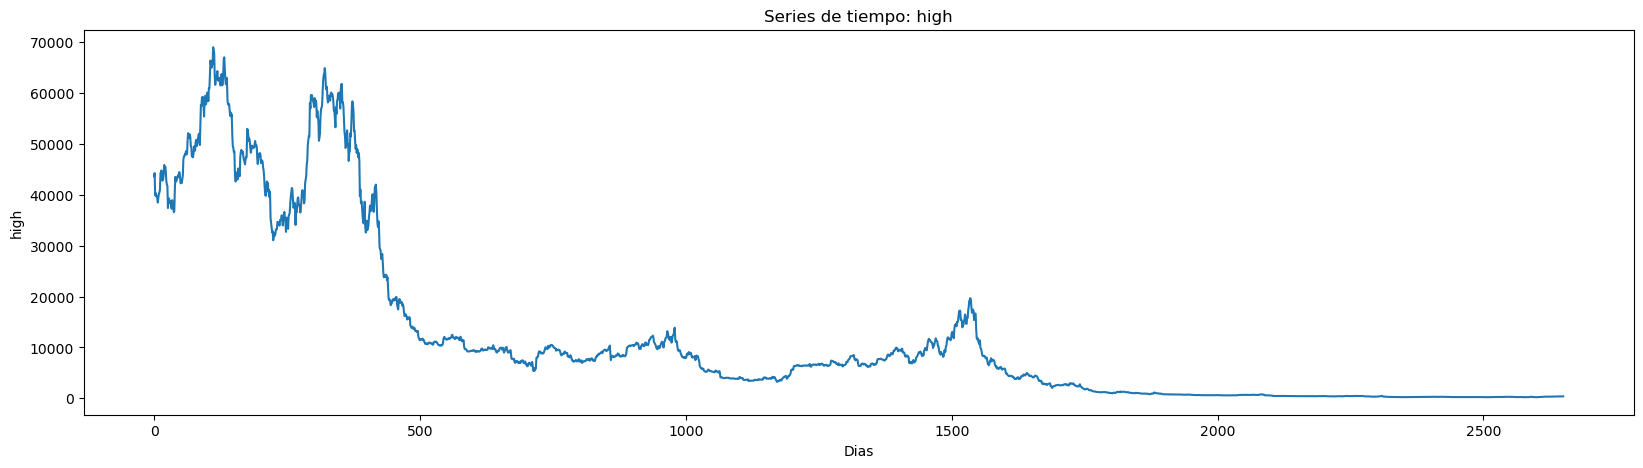

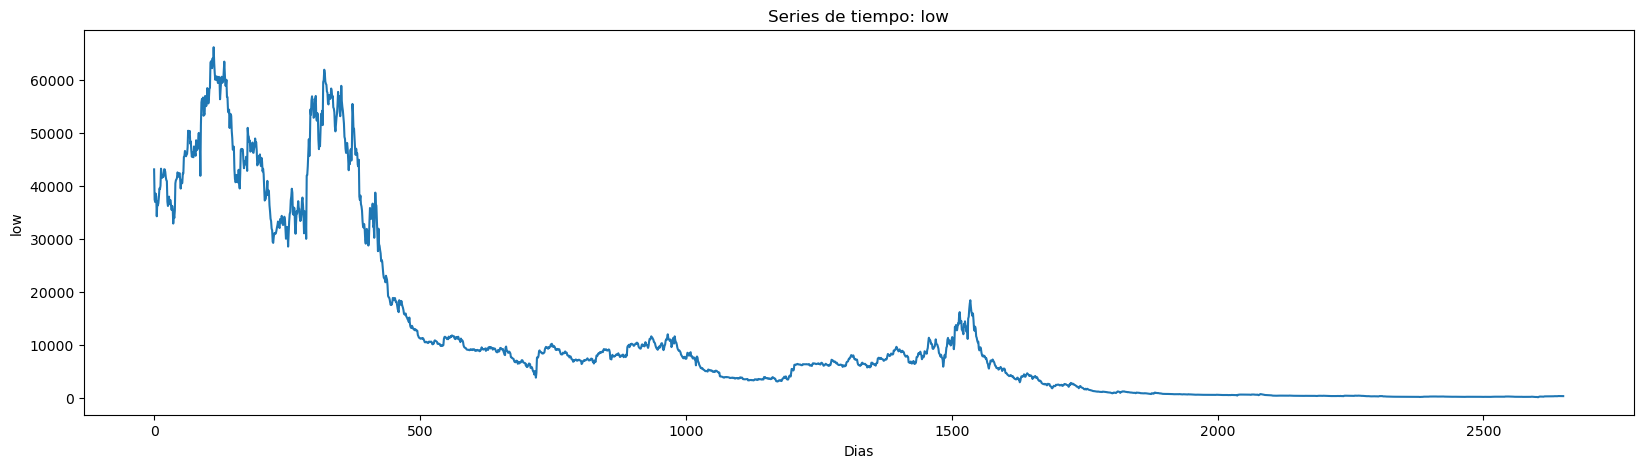

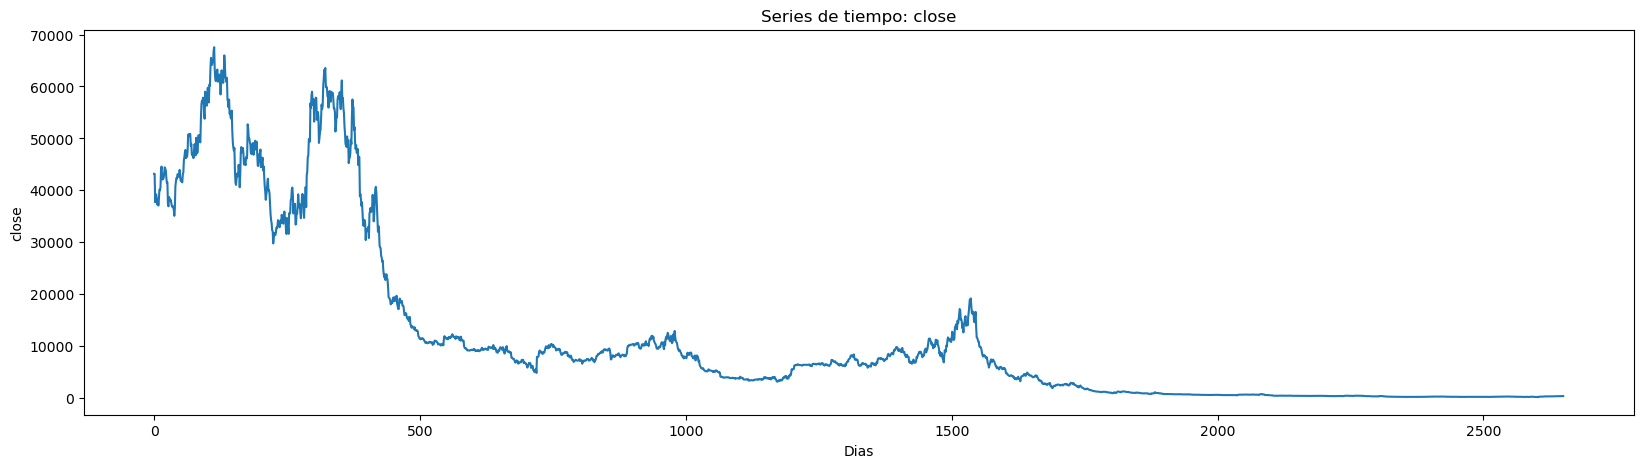

In [13]:
import matplotlib.pyplot as plt

# Define el tamaño de cada figura
fig_size = (20, 5)  # Ajusta el tamaño según tus necesidades

# Itera sobre las columnas del DataFrame
for column in df.columns:
    plt.figure(figsize=fig_size)  # Crea una nueva figura para cada columna
    df[column].plot(use_index=False)
    plt.xlabel('Dias')
    plt.ylabel(column)
    plt.title(f'Series de tiempo: {column}')
    plt.show()

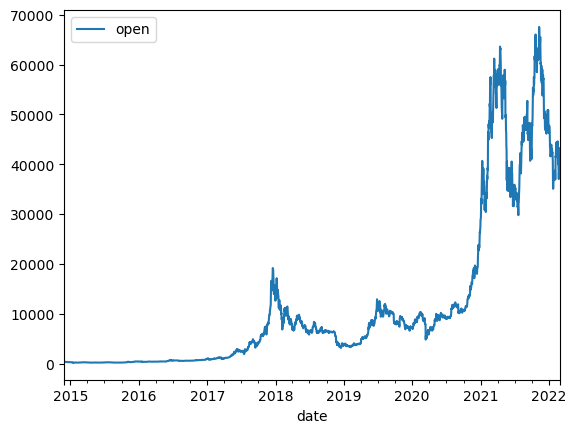

In [14]:
# Serie de tiempo
df.plot(y="open")
plt.show()

# Descomposición

In [15]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [16]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

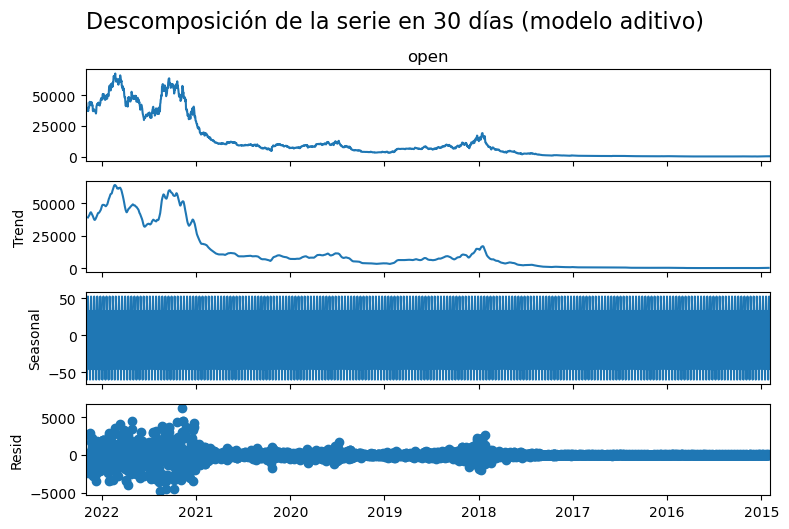

In [20]:
# Descomposición de la serie
sd = seasonal_decompose(df["open"],period=12)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

# Autocovarianza

In [21]:
#Calcular la varianza de la serie de tiempo
varianza = df['open'].var()
print(varianza)

264796037.9764274


In [24]:
#Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['open'].cov(df['open'].shift(1))
#Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['open'].cov(df['open'].shift(7))
#Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['open'].cov(df['open'].shift(30))
print("Autocovarianza:")
print("Autocovarianza con 1 rezago: ",round(autocovarianza_lag1,4))
print("Autocovarianza con 7 rezagos: ", round(autocovarianza_lag7,4))
print("Autocovarianza con 30 rezagos: ", round(autocovarianza_lag30,4))

Autocovarianza:
Autocovarianza con 1 rezago:  264364705.3688
Autocovarianza con 7 rezagos:  262110610.435
Autocovarianza con 30 rezagos:  252078398.3633


In [25]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.9984
Autocovarianza con 7 rezagos: 0.9899
Autocovarianza con 30 rezagos: 0.952


# Autocorrelación

In [27]:
autocorrelation_lag1 = df['open'].autocorr(lag=1)
print("Autocorrelación con 1 rezago: ", round(autocorrelation_lag1,4))

autocorrelation_lag7 = df['open'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos: ", round(autocorrelation_lag7,4))

autocorrelation_lag30 = df['open'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos: ", round(autocorrelation_lag30,4))

Autocorrelación con 1 rezago:  0.9988
Autocorrelación con 7 rezagos:  0.9916
Autocorrelación con 30 rezagos:  0.9615


In [18]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

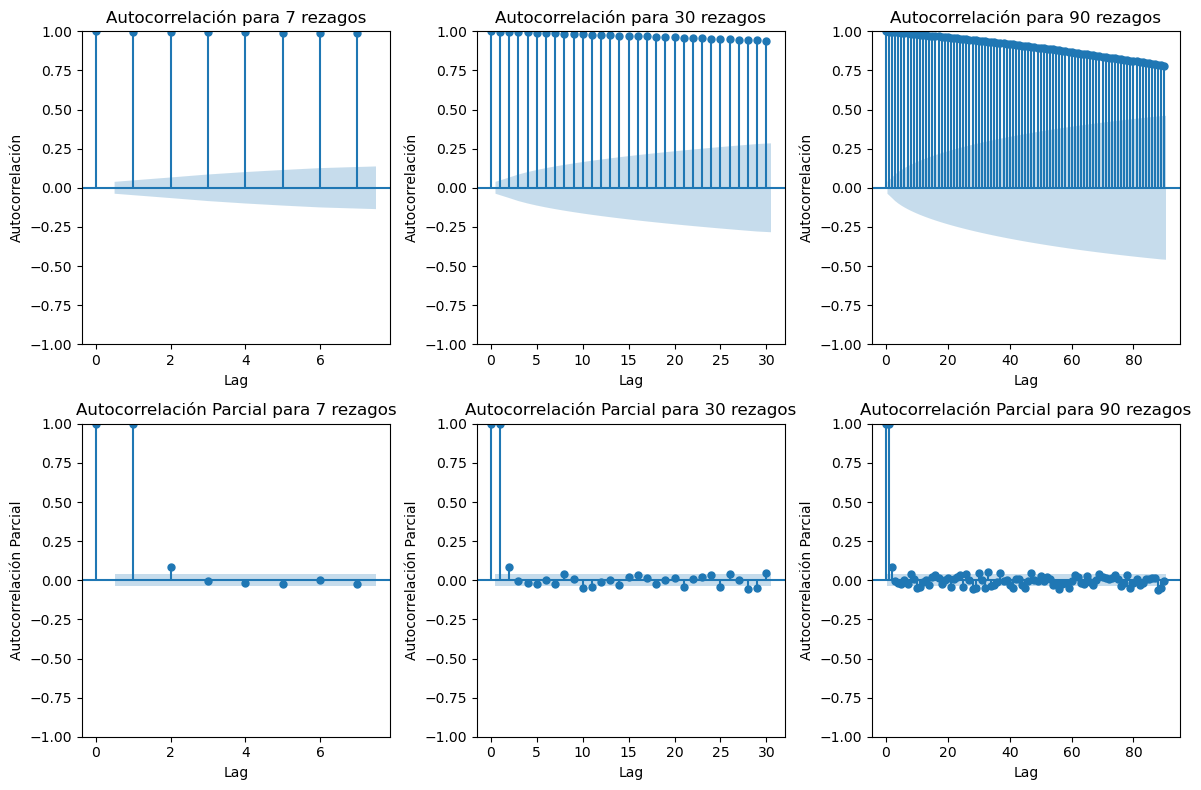

In [29]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['open'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['open'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Estacionariedad

In [30]:
# Importar librerías para test de estacionariedad
from statsmodels.tsa.stattools import adfuller,kpss

In [31]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [32]:
adf_output = adfuller(df['open'])
kpss_output = kpss(df['open'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

C:\Users\Diego\AppData\Local\Temp\ipykernel_2972\4211702602.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df['open'])


,adf,kpss
Test Statistic,-1.923378,5.256281
p-value,0.321144,0.01
Rezagos,28,30
Decisión,No Estacionaria,No Estacionaria
Critical Value (1%),-3.432846,0.739
Critical Value (5%),-2.862643,0.463
Critical Value (10%),-2.567357,0.347
Critical Value (2.5%),NaN,0.574


# MODELOS ESTOCÁSTICOS

# PREPROCESAMIENTO

In [33]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = pd.to_datetime('2020-01-01')  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

print(f'Train set: {train.shape}')
print(f'Test set: {test.shape}')

Train set: (1861, 4)
Test set: (790, 4)


In [35]:
# Definir variable objetivo
y_train = train["open"]
y_test = test["open"]

In [36]:
# Últimas fechas del conjunto de entrenamiento
y_train.tail()

date
2014-12-02    378.39
2014-12-01    376.40
2014-11-30    376.57
2014-11-29    376.42
2014-11-28    363.59
Name: open, dtype: float64

In [37]:
# Primeras fechas del conjunto de prueba
y_test.head()

date
2022-03-01    43221.71
2022-02-28    37717.10
2022-02-27    39146.66
2022-02-26    39242.64
2022-02-25    38360.93
Name: open, dtype: float64

# Modelo ARIMAX(p,d,q)

In [38]:
# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["open"])
X_test = test.drop(columns=["open"])

C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was p

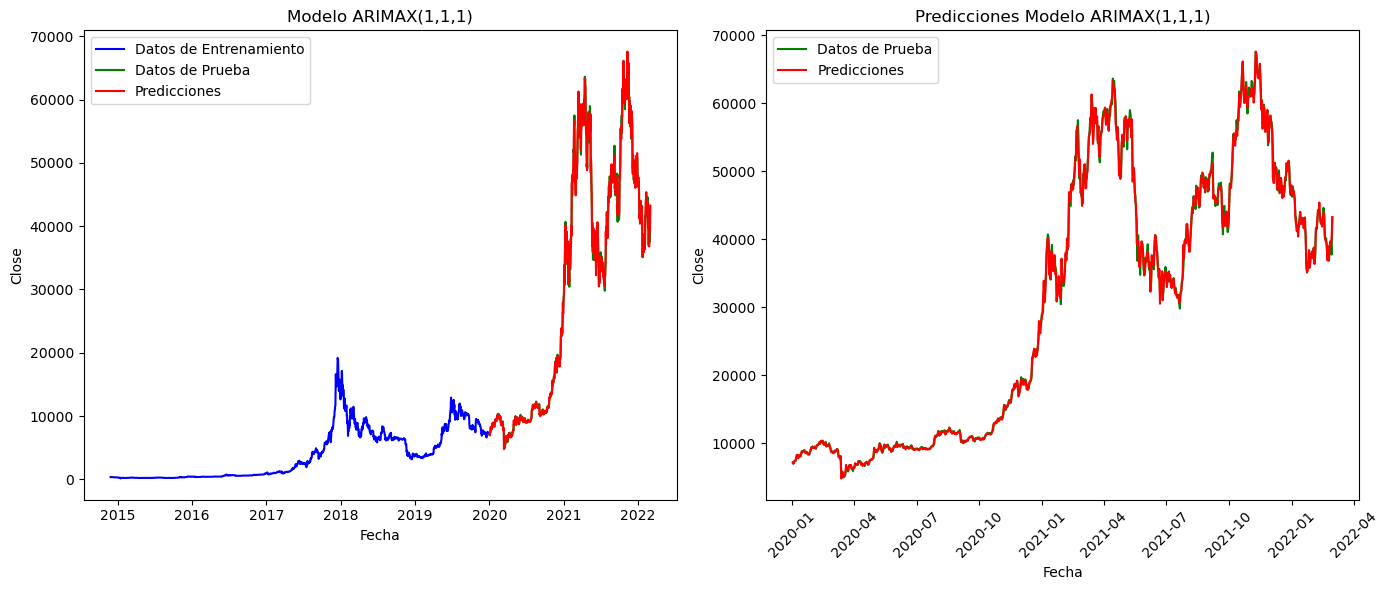

            Predicción ARIMAX(1,1,1)  Observación
Fecha                                            
2022-03-01              43226.596448     43221.71
2022-02-28              40198.626198     37717.10
2022-02-27              39216.511639     39146.66
2022-02-26              39671.400829     39242.64
2022-02-25              38590.859403     38360.93
2022-02-24              36805.236902     37253.26
2022-02-23              38939.916219     38269.94
2022-02-22              36862.256612     37036.98
2022-02-21              39127.485298     38384.09
2022-02-20              39638.433455     40108.62
2022-02-19              39758.037385     40008.75
2022-02-18              40314.457765     40532.66
2022-02-17              43762.449597     43901.49
2022-02-16              43820.009430     44590.75
2022-02-15              42984.038480     42567.27
2022-02-14              41844.152402     42078.53
2022-02-13              42283.338545     42232.68
2022-02-12              42344.333142     42392.22


In [39]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Ajustar el modelo ARIMAX con los datos de entrenamiento
modelo_ARIMAX = ARIMA(y_train, order=(1, 1, 1), exog=X_train)
result = modelo_ARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_ARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Definir date_range como las fechas del conjunto de prueba
date_range = test.index

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo ARIMAX(1,1,1)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_ARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo ARIMAX(1,1,1)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción ARIMAX(1,1,1)": pred_ARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Calcular las métricas
mae_ARIMAX = mean_absolute_error(y_test, pred_ARIMAX)  # MAE
mse_ARIMAX = mean_squared_error(y_test, pred_ARIMAX)   # MSE
rmse_ARIMAX = mean_squared_error(y_test, pred_ARIMAX, squared=False)  # RMSE (raíz del MSE)
mape_ARIMAX = mean_absolute_percentage_error(y_test, pred_ARIMAX) * 100  # MAPE en porcentaje
r2_ARIMAX = r2_score(y_test, pred_ARIMAX)  # R²

# Imprimir las métricas
print(f"MAE: {mae_ARIMAX:.2f}")
print(f"MSE: {mse_ARIMAX:.2f}")
print(f"RMSE: {rmse_ARIMAX:.2f}")
print(f"MAPE: {mape_ARIMAX:.2f}%")
print(f"R²: {r2_ARIMAX:.2f}")



MAE: 424.13
MSE: 490036.69
RMSE: 700.03
MAPE: 1.40%
R²: 1.00


C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Modelo SARIMAX(p,d,q)(P,D,Q,s)

C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Diego\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization 

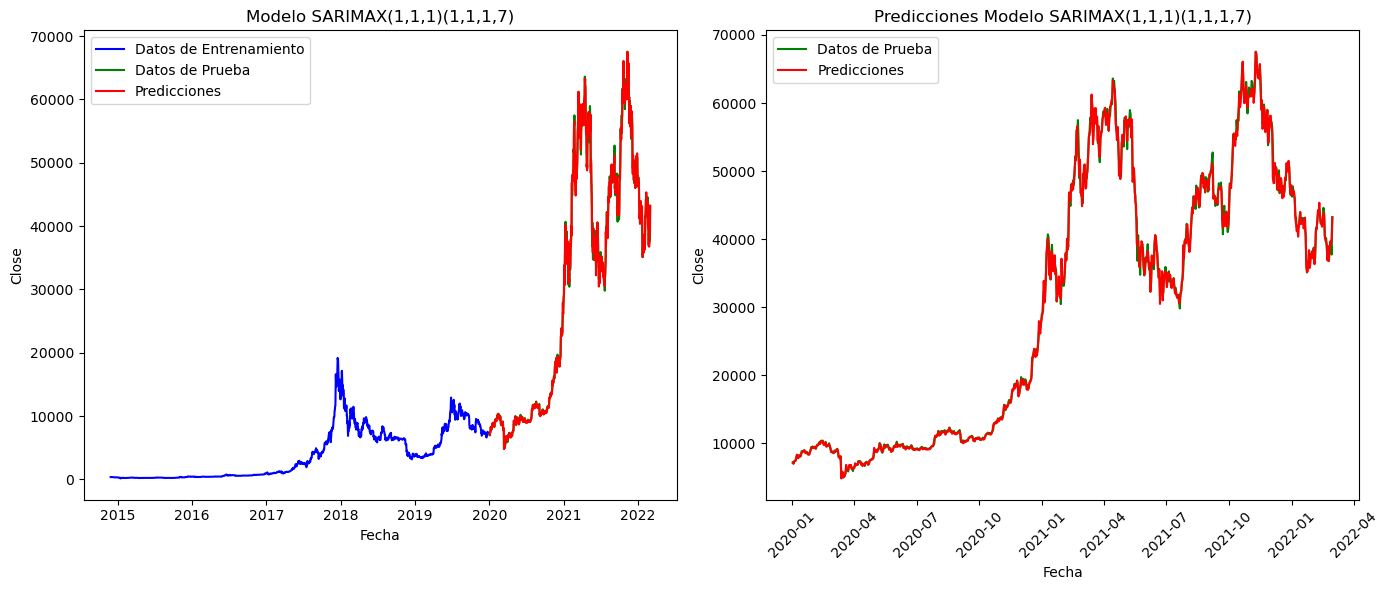

            Predicción SARIMAX(1,1,1)(1,1,1,7)  Observación
Fecha                                                      
2022-03-01                        43198.320880     43221.71
2022-02-28                        40145.639288     37717.10
2022-02-27                        39191.572952     39146.66
2022-02-26                        39638.849130     39242.64
2022-02-25                        38574.177219     38360.93
2022-02-24                        36755.355606     37253.26
2022-02-23                        38929.067802     38269.94
2022-02-22                        36832.285826     37036.98
2022-02-21                        39092.116974     38384.09
2022-02-20                        39614.262132     40108.62
2022-02-19                        39726.124166     40008.75
2022-02-18                        40297.991036     40532.66
2022-02-17                        43720.060133     43901.49
2022-02-16                        43804.494589     44590.75
2022-02-15                        42950.

In [41]:
# -------------------- MODELAMIENTO -------------------- #

# Importar librerías necesarias
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMAX con los datos de entrenamiento
modelo_SARIMAX = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result = modelo_SARIMAX.fit()

# Hacer predicciones en el conjunto de prueba
pred_SARIMAX = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# ---------------------- GRAFICOS ---------------------- #

# Crear una figura y ejes para los dos gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Observaciones del conjunto de entrenamiento, predicciones y observaciones del conjunto de prueba
plt.subplot(1, 2, 1)
plt.plot(train.index, y_train, label="Datos de Entrenamiento", color="blue")
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()

# Segundo gráfico: Zoom en las observaciones del conjunto de prueba y las predicciones
plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label="Datos de Prueba", color="green")
plt.plot(date_range, pred_SARIMAX, label="Predicciones", color="red")
plt.xlabel("Fecha")
plt.ylabel("Close")
plt.title("Predicciones Modelo SARIMAX(1,1,1)(1,1,1,7)")
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# ----------------------- TABLA ----------------------- #

# Crear una tabla de pandas con las fechas, predicciones y observaciones
pred_df = pd.DataFrame({"Fecha": date_range, "Predicción SARIMAX(1,1,1)(1,1,1,7)": pred_SARIMAX, "Observación": y_test.values})
# Establecer las fechas como índice
pred_df.set_index("Fecha", inplace=True)
# Imprimir el DataFrame completo
print(pred_df.to_string(max_rows=len(pred_df)))

In [42]:
# Importar librerías necesarias
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_SARIMAX = mean_absolute_error(y_test, pred_SARIMAX)
mape_SARIMAX = mean_absolute_percentage_error(y_test, pred_SARIMAX)
rmse_SARIMAX = rmse(y_test, pred_SARIMAX)
rmspe_SARIMAX = rmspe(y_test, pred_SARIMAX)
r2_SARIMAX = r2_score(y_test, pred_SARIMAX)

# Imprimir las métricas
print(f"MAE: {mae_SARIMAX:.2f}")
print(f"MAPE: {mape_SARIMAX:.2f}%")
print(f"RMSE: {rmse_SARIMAX:.2f}")
print(f"RMSPE: {rmspe_SARIMAX:.2f}%")
print(f"r2: {r2_SARIMAX:.2f}")

MAE: 428.46
MAPE: 0.01%
RMSE: 703.19
RMSPE: 0.20%
r2: 1.00


# REDES NEURONALES


# PREPROCESAMIENTO

In [44]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split

# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Especificar el punto de división del conjunto de entrenamiento y prueba
split_date = pd.to_datetime('2020-01-01')  # Se utiliza como fecha de corte el último mes del dataset
# (Dependiendo del caso, el tamaño del conjunto de prueba puede ser mayor o menor)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc[df.index <= split_date]
test = df.loc[df.index > split_date]

# Definir variable objetivo
y_train = train["open"]
y_test = test["open"]

# Todas las columnas excepto "Close" son variables exógenas
X_train = train.drop(columns=["open"])
X_test = test.drop(columns=["open"])

# -------------------- NORMALIZACIÓN DE LOS DATOS -------------------- #

# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Normalizar los datos de entrenamiento y prueba de las variables exógenas
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Convertir DataFrame a array de numpy
X_train = np.array(X_train)
X_test = np.array(X_test)

# Redimensionar los datos normalizados para que se ajusten al formato de entrada de la red neuronal
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [46]:
print(X_train.shape)
print(X_test.shape)

(1861, 1, 3)
(790, 1, 3)


# SimpleRNN

In [47]:
# Importar las bibliotecas necesarias
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -------------------- DEFINICIÓN DEL MODELO -------------------- #
modelo_RNN = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
modelo_RNN.add(Dropout(0.2))

# 2. Capas ocultas:
modelo_RNN.add(LSTM(units=50, activation='relu', return_sequences=True))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(LSTM(units=50, activation='relu'))
modelo_RNN.add(Dropout(0.2))
modelo_RNN.add(Dense(50, activation='relu'))
modelo_RNN.add(Dropout(0.2))

# 3. Capa de salida
modelo_RNN.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #
modelo_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- CALLBACKS -------------------- #
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# -------------------- ENTRENAMIENTO -------------------- #
entrenamiento = modelo_RNN.fit(X_train, y_train, 
                               epochs=100, 
                               batch_size=32, 
                               validation_data=(X_test, y_test), 
                               verbose=1,
                               callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
59/59 [==============================] - 3s 9ms/step - loss: 30525936.0000 - val_loss: 1265528576.0000
Epoch 2/100
49/59 [=======================>......] - ETA: 0s - loss: 30201360.0000

C:\Users\Diego\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - 0s 3ms/step - loss: 29241852.0000 - val_loss: 580701120.0000
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 11366552.0000 - val_loss: 1278084224.0000
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 3900348.7500 - val_loss: 592838592.0000
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 2226966.2500 - val_loss: 273559872.0000
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 1595800.0000 - val_loss: 233751696.0000
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 1307346.3750 - val_loss: 98804160.0000
Epoch 8/100
59/59 [==============================] - 0s 3ms/step - loss: 1143251.6250 - val_loss: 72464544.0000
Epoch 9/100
59/59 [==============================] - 0s 3ms/step - loss: 963066.3750 - val_loss: 48982384.0000
Epoch 10/100
59/59 [==============================] - 0s 3ms/step - loss: 858419.7500 - val_loss: 22804386.00

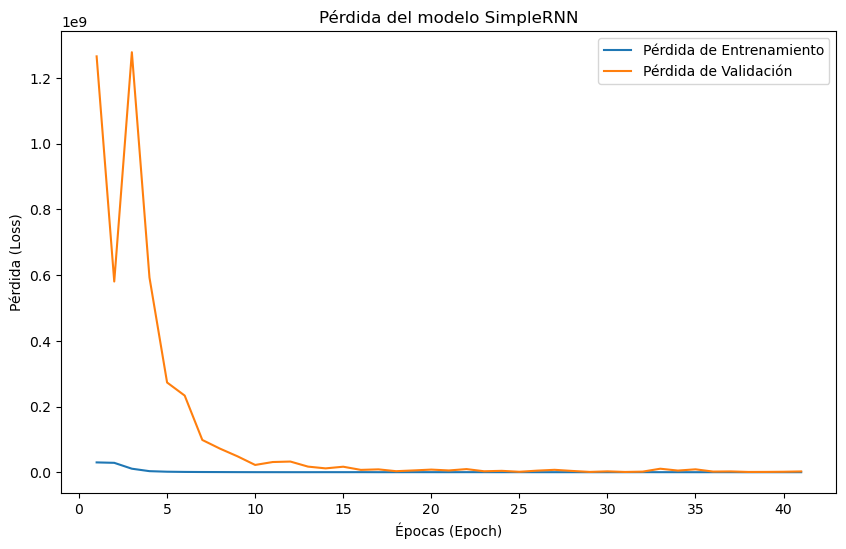

In [49]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo SimpleRNN')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

25/25 [==============================] - 0s 1ms/step


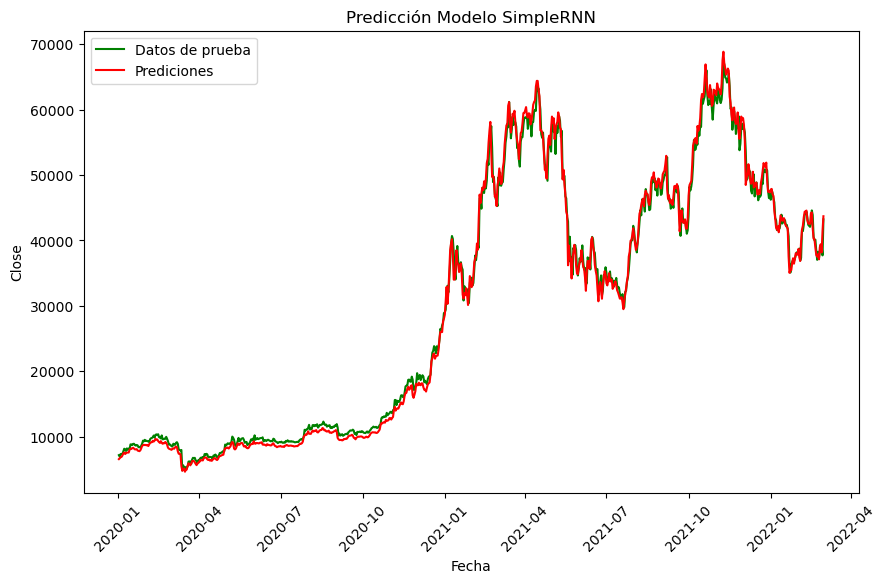

In [50]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_RNN = modelo_RNN.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_RNN, color='red', label='Prediciones')
plt.title('Predicción Modelo SimpleRNN')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [51]:
# -------------------- EVALUACIÓN -------------------- #

# Importar librerías necesarias
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

# Calcular las métricas
mae_RNN = mean_absolute_error(y_test, pred_RNN)
mape_RNN = mean_absolute_percentage_error(y_test, pred_RNN)
rmse_RNN = np.sqrt(mean_squared_error(y_test, pred_RNN))
rmspe_RNN = rmspe(y_test, pred_RNN)[0]  # Tomamos el primer valor del array
r2_RNN = r2_score(y_test, pred_RNN)

# Imprimir las métricas
print(f"MAE: {mae_RNN:.2f}")
print(f"MAPE: {mape_RNN:.2f}%")
print(f"RMSE: {rmse_RNN:.2f}")
print(f"RMSPE: {rmspe_RNN:.2f}%")
print(f"R2: {r2_RNN:.2f}")

MAE: 922.26
MAPE: 0.04%
RMSE: 1218.74
RMSPE: 0.11%
R2: 1.00


# Red LSTM

In [52]:
# Importar librerías necesarias
from keras.layers import LSTM

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_LSTM = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa LSTM con 50 neuronas y función de activación ReLU para extraer características de la secuencia de entrada.
modelo_LSTM.add(LSTM(units=50, activation='relu'))

# 2. Capas ocultas:

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_LSTM.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_LSTM.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_LSTM.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 30527432.0000 - val_loss: 1274331136.0000
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 30495908.0000 - val_loss: 1266776064.0000
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 30334598.0000 - val_loss: 1243620864.0000
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 29840336.0000 - val_loss: 1196278528.0000
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 28826372.0000 - val_loss: 1117759360.0000
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 27195186.0000 - val_loss: 1007611456.0000
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 24925098.0000 - val_loss: 866728512.0000
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 22130614.0000 - val_loss: 700552448.0000
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 18822360.

59/59 [==============================] - 0s 2ms/step - loss: 43412.1367 - val_loss: 1637631.0000
Epoch 75/100
59/59 [==============================] - 0s 2ms/step - loss: 43283.2383 - val_loss: 1542526.5000
Epoch 76/100
59/59 [==============================] - 0s 2ms/step - loss: 43243.4688 - val_loss: 1582610.0000
Epoch 77/100
59/59 [==============================] - 0s 2ms/step - loss: 43474.7227 - val_loss: 1728359.8750
Epoch 78/100
59/59 [==============================] - 0s 2ms/step - loss: 42858.1797 - val_loss: 1684444.8750
Epoch 79/100
59/59 [==============================] - 0s 2ms/step - loss: 43209.3320 - val_loss: 1576418.1250
Epoch 80/100
59/59 [==============================] - 0s 2ms/step - loss: 42915.2109 - val_loss: 1507697.6250
Epoch 81/100
59/59 [==============================] - 0s 2ms/step - loss: 43614.5039 - val_loss: 1170258.3750
Epoch 82/100
59/59 [==============================] - 0s 2ms/step - loss: 43041.3672 - val_loss: 1593956.6250
Epoch 83/100
59/59 [===

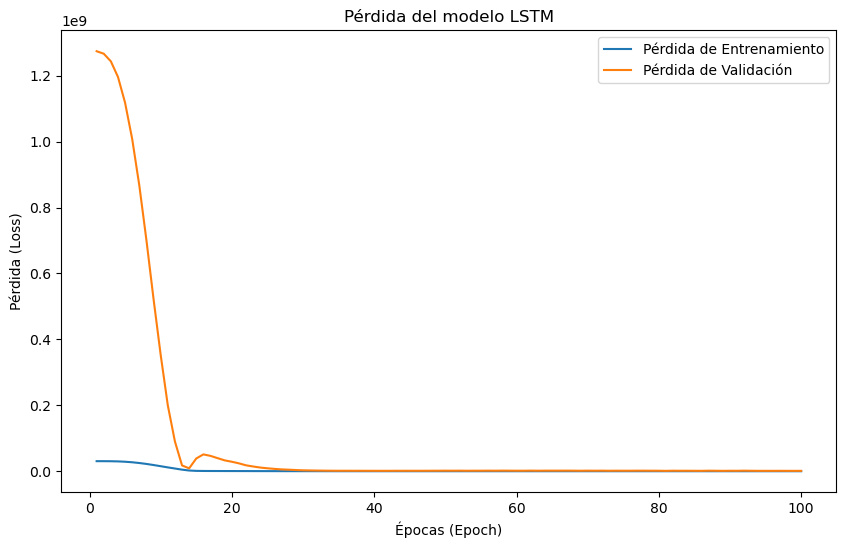

In [53]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo LSTM')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()

25/25 [==============================] - 0s 919us/step


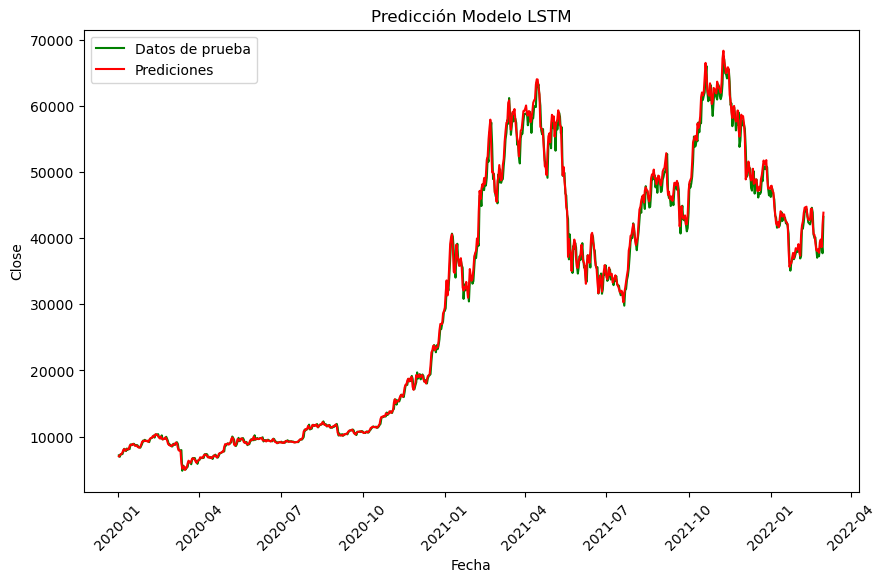

In [54]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_LSTM = modelo_LSTM.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_LSTM, color='red', label='Prediciones')
plt.title('Predicción Modelo LSTM')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [55]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas para el modelo LSTM
mae_LSTM = mean_absolute_error(y_test, pred_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test, pred_LSTM)
rmse_LSTM = np.sqrt(mean_squared_error(y_test, pred_LSTM))
rmspe_LSTM = rmspe(y_test, pred_LSTM)[0]  # Tomamos el primer valor del array
r2_LSTM = r2_score(y_test, pred_LSTM)

# Imprimir las métricas del modelo LSTM
print(f"MAE: {mae_LSTM:.2f}")
print(f"MAPE: {mape_LSTM:.2f}%")
print(f"RMSE: {rmse_LSTM:.2f}")
print(f"RMSPE: {rmspe_LSTM:.2f}%")
print(f"R2: {r2_LSTM:.2f}")


MAE: 673.49
MAPE: 0.02%
RMSE: 1085.45
RMSPE: 0.15%
R2: 1.00


# Red GRU

In [56]:
# Importar librerías necesarias
from keras.layers import GRU

# -------------------- DEFINICIÓN DEL MODELO -------------------- #

# Creación de un modelo con estructura secuencial
modelo_GRU = Sequential()

# ------------------ CAPAS DE LA RED NEURONAL ------------------ #

# 1. Capa de entrada:
# Capa GRU con 50 unidades y función de activación relu
modelo_GRU.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# 2. Capas ocultas

# Capa de dropout con una tasa de 20% para regularizar y prevenir el sobreajuste:
modelo_GRU.add(Dropout(0.2))

# Capa densa con regularización L2 (λ = 0.01) para controlar el crecimiento de los pesos y reducir el sobreajuste:
modelo_GRU.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))

# 3. Capa de salida
modelo_GRU.add(Dense(1))

# -------------------- COMPILACIÓN -------------------- #

# Compilar el modelo con optimizador Adam con tasa de aprendizaje=0.001 para disminuir la función de pérdida mse
modelo_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# -------------------- ENTRENAMIENTO -------------------- #

# Entrenar el modelo con los conjuntos de entrenamiento
entrenamiento = modelo_GRU.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
59/59 [==============================] - 1s 4ms/step - loss: 30522412.0000 - mean_absolute_error: 3869.2139 - val_loss: 1273606400.0000 - val_mean_absolute_error: 30104.7168
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 30446322.0000 - mean_absolute_error: 3862.4180 - val_loss: 1263105408.0000 - val_mean_absolute_error: 29984.8613
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 30098204.0000 - mean_absolute_error: 3831.5085 - val_loss: 1228349056.0000 - val_mean_absolute_error: 29581.3496
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 29100244.0000 - mean_absolute_error: 3741.1975 - val_loss: 1156816000.0000 - val_mean_absolute_error: 28722.2207
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 27158904.0000 - mean_absolute_error: 3570.6892 - val_loss: 1039524736.0000 - val_mean_absolute_error: 27247.7891
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - los

59/59 [==============================] - 0s 2ms/step - loss: 206514.3281 - mean_absolute_error: 286.1021 - val_loss: 3482082.5000 - val_mean_absolute_error: 1256.0630
Epoch 47/100
59/59 [==============================] - 0s 2ms/step - loss: 229641.6562 - mean_absolute_error: 290.1539 - val_loss: 3767034.7500 - val_mean_absolute_error: 1314.8807
Epoch 48/100
59/59 [==============================] - 0s 2ms/step - loss: 249513.5312 - mean_absolute_error: 304.7633 - val_loss: 3475699.7500 - val_mean_absolute_error: 1255.0653
Epoch 49/100
59/59 [==============================] - 0s 2ms/step - loss: 231870.4531 - mean_absolute_error: 282.0509 - val_loss: 3009975.5000 - val_mean_absolute_error: 1154.3607
Epoch 50/100
59/59 [==============================] - 0s 2ms/step - loss: 245841.4531 - mean_absolute_error: 295.6040 - val_loss: 3693717.5000 - val_mean_absolute_error: 1300.6469
Epoch 51/100
59/59 [==============================] - 0s 2ms/step - loss: 222708.0469 - mean_absolute_error: 286.

Epoch 92/100
59/59 [==============================] - 0s 2ms/step - loss: 190163.0469 - mean_absolute_error: 249.0597 - val_loss: 1736717.2500 - val_mean_absolute_error: 837.8617
Epoch 93/100
59/59 [==============================] - 0s 2ms/step - loss: 219842.1250 - mean_absolute_error: 263.7603 - val_loss: 1890193.1250 - val_mean_absolute_error: 882.8829
Epoch 94/100
59/59 [==============================] - 0s 2ms/step - loss: 224026.0469 - mean_absolute_error: 263.3760 - val_loss: 2295044.2500 - val_mean_absolute_error: 995.6984
Epoch 95/100
59/59 [==============================] - 0s 2ms/step - loss: 224357.8594 - mean_absolute_error: 263.3509 - val_loss: 2767027.7500 - val_mean_absolute_error: 1118.2767
Epoch 96/100
59/59 [==============================] - 0s 2ms/step - loss: 219247.7656 - mean_absolute_error: 262.1912 - val_loss: 1737214.8750 - val_mean_absolute_error: 838.3455
Epoch 97/100
59/59 [==============================] - 0s 2ms/step - loss: 228262.2969 - mean_absolute_er

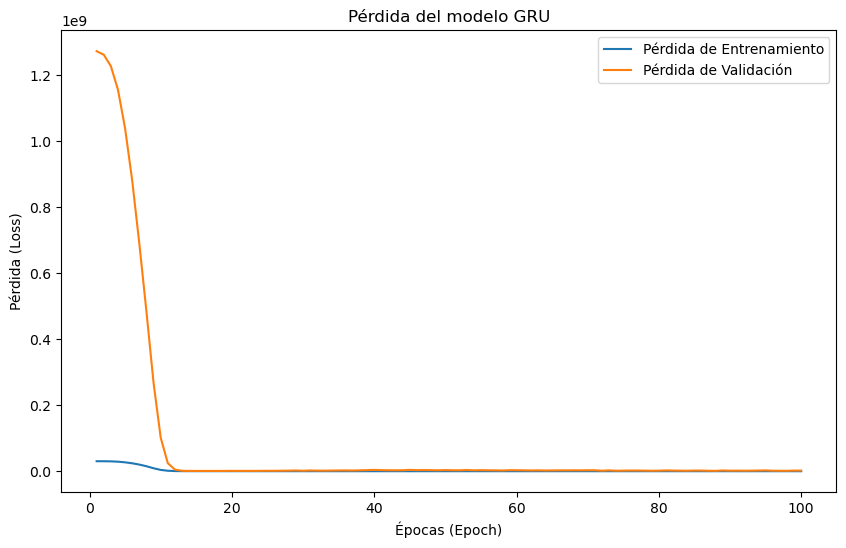

In [57]:
# ------------------- PÉRDIDA DEL MODELO ------------------- #

# Graficar la función de pérdida versus las épocas
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de Validación')
plt.title('Pérdida del modelo GRU')
plt.xlabel('Épocas (Epoch)')
plt.ylabel('Pérdida (Loss)')
plt.legend()
plt.show()


25/25 [==============================] - 0s 772us/step


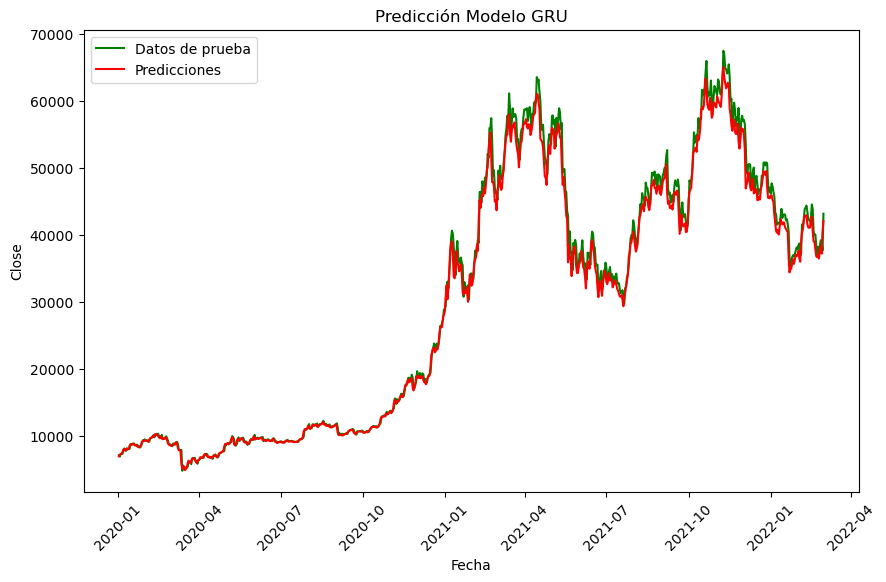

In [58]:
# -------------------- PREDICCIÓN -------------------- #

# Realizar predicciones con el conjunto de prueba de las variables exógenas
pred_GRU = modelo_GRU.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, color='green', label='Datos de prueba')
plt.plot(y_test.index, pred_GRU, color='red', label='Predicciones')
plt.title('Predicción Modelo GRU')
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.legend()
plt.xticks(rotation=45)  # Girar las etiquetas del eje x en 45 grados
plt.show()

In [59]:
# -------------------- EVALUACIÓN -------------------- #

# Calcular las métricas
mae_GRU = mean_absolute_error(y_test, pred_GRU)
mape_GRU = mean_absolute_percentage_error(y_test, pred_GRU)
rmse_GRU = np.sqrt(mean_squared_error(y_test, pred_GRU))
rmspe_GRU = rmspe(y_test, pred_GRU)[0]  # Tomamos el primer valor del array
r2_GRU = r2_score(y_test, pred_GRU)

# Imprimir las métricas
print(f"MAE: {mae_GRU:.2f}")
print(f"MAPE: {mape_GRU:.2f}%")
print(f"RMSE: {rmse_GRU:.2f}")
print(f"RMSPE: {rmspe_GRU:.2f}%")
print(f"R2: {r2_GRU:.2f}")

MAE: 948.04
MAPE: 0.03%
RMSE: 1460.13
RMSPE: 0.25%
R2: 0.99


# EVALUACION

# MODELOS ESTOCASTICOS

# REDES NEURONALES